## DATA ANALYSIS ON WORLD HAPPINESS REPORT 2021

BY CHIBUZO AKANA
######  (Data Source - Kaggle)

### TABLE OF CONTENT

- Introduction
- Load Libraries
- Load data
- Prepare and clean data
- Analyse and Visualize Data
- Summary and Conclusion

### INTRODUCTION

The World Happiness Report is a landmark survey of the state of global happiness. Through this report, I will analyse 

visualize through the relationships from columns such as; Country name, Regional indicator, Happiness(Ladder) score, 

Logged GDP per Capita, Healthy life expectancy, Generosity, Perceptions of corruption. Through this analyses I will be 

answering the following questions;
- Which region has the highest the happiness score?
- Which region has the highest the GDP?
- How many countries make up each region?
- What are the correlation between the columns listed above?
- Which region has an increased level of corruption?
- Is there a relationship between happiness and corruption?

In [73]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Set style and runtime configurations for chart through seaborn and matplotlib functions

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
# Load dataset

df = pd.read_csv('world-happiness-report-2021.csv')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


#### CLEAN AND PREPARE DATA

In [4]:
# check for the number of rows and columns this dataset

df.shape

(149, 20)

In [5]:
# Check info to ascertain any null or missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
# Count null or missing values

df.isna().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [7]:
# Check for duplicated data

df.duplicated().sum()

0

In [8]:
# Choose the columns to analyse

df_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

In [9]:
df = df[df_columns].copy()
df

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [10]:
# Columns ready for analysesb

df.rename(columns = {'Country name':'country_name', 'Regional indicator':'regional_indicator', 'Ladder score':'happiness_score', 'Logged GDP per capita':'logged_gdp_per_capita', 'Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy', 'Freedom to make life choices':'freedom_to_make_life_choices', 'Generosity':'generocity', 'Perceptions of corruption':'perceptions_of_corruption'}, inplace=True)

In [11]:
df

,country_name,regional_indicator,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generocity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


#### ANALYSE AND VISUALIZE DATA

#### a. Which region has the highest the happiness score?
From the above analyses, the region with the highest happiness score is the western europe region.


Text(0, 0.5, 'GDP per capita')

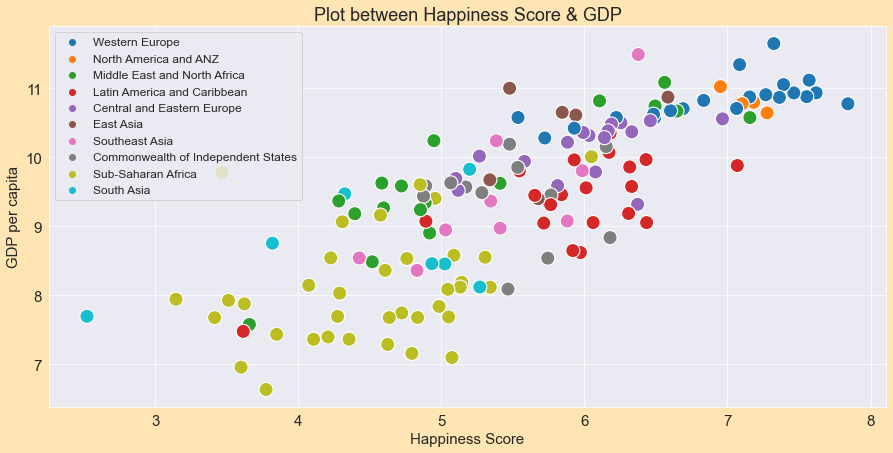

In [16]:
# plot chart using scatterplot to show regions according to happiness score

plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness Score & GDP')
sns.scatterplot(x = df.happiness_score, y = df.logged_gdp_per_capita, hue = df.regional_indicator, s = 200);

plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [28]:
# Group region according to gdp per capita to find region with their varying gdp

gdp_region = df.groupby('regional_indicator')['logged_gdp_per_capita'].sum()
gdp_region.sort_values(ascending=False)

regional_indicator
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Latin America and Caribbean           187.400
Central and Eastern Europe            171.854
Middle East and North Africa          164.324
Commonwealth of Independent States    112.822
Southeast Asia                         84.793
East Asia                              62.206
South Asia                             60.778
North America and ANZ                  43.238
Name: logged_gdp_per_capita, dtype: float64

#### b. Which region has the highest the GDP?
The region with the highest GDP per capita is the Sub-Saharan Africa and this can be attributed to the high number of countries that made up th region.


Text(0, 0.5, '')

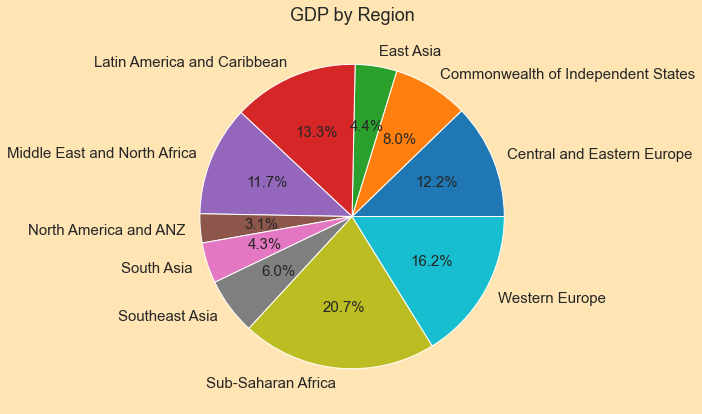

In [32]:
# Format chart to show percentage values

gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

#### c. How many countries make up each region?


In [38]:
# Total country

total_country = df.groupby('regional_indicator')[['country_name']].count()
total_country

,country_name
regional_indicator,
Central and Eastern Europe,17
Commonwealth of Independent States,12
East Asia,6
Latin America and Caribbean,20
Middle East and North Africa,17
North America and ANZ,4
South Asia,7
Southeast Asia,9
Sub-Saharan Africa,36


#### d. What are the correlations between the columns?


<AxesSubplot:>

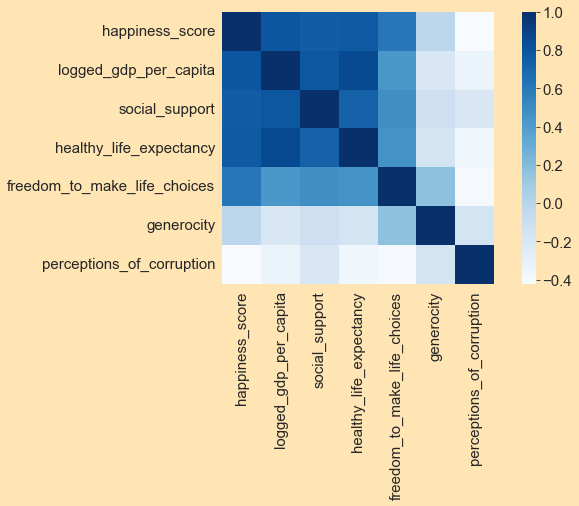

In [45]:
# Correlation between the columns

cor = df.corr(method ="pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = bool),
            cmap='Blues', square=True, ax=ax)

In [56]:
# Average perceptions of corruption in a region

corruption = df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


#### d. Which region has an increased level of corruption?


<BarContainer object of 10 artists>

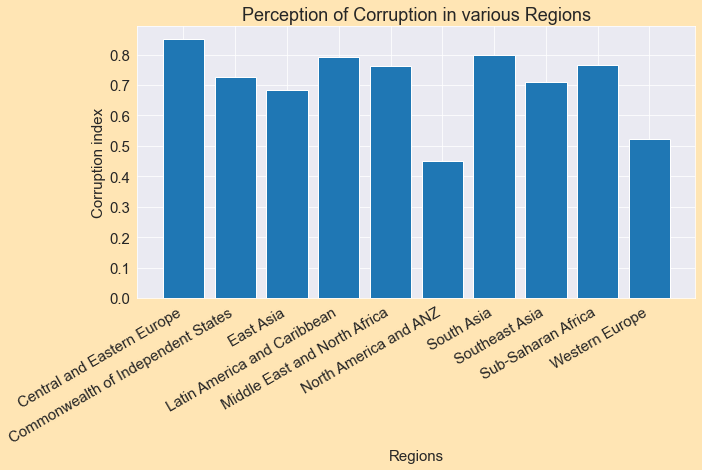

In [57]:
# Chart showing corruption index

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption index', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

Text(0, 0.5, 'Happiness Score')

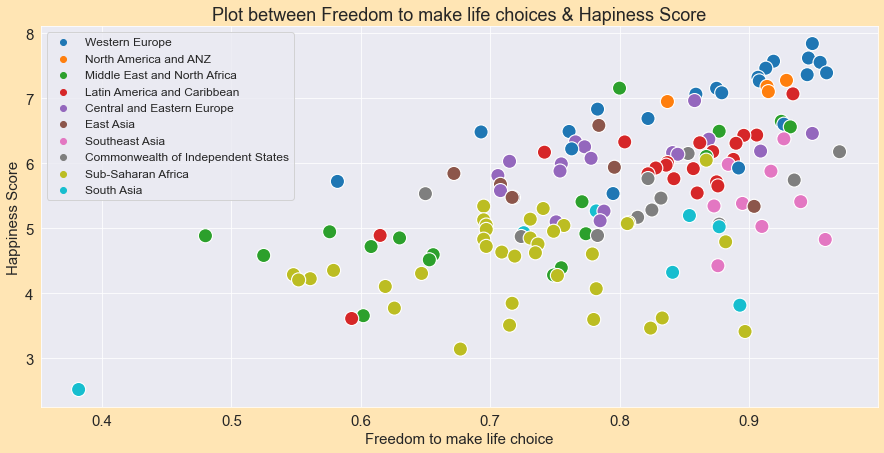

In [60]:
# plot chart using scatterplot to show regions according to freedom to make life choices


plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Freedom to make life choices & Hapiness Score')
sns.scatterplot(x = df.freedom_to_make_life_choices, y = df.happiness_score, hue = df.regional_indicator, s = 200);

plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom to make life choice')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

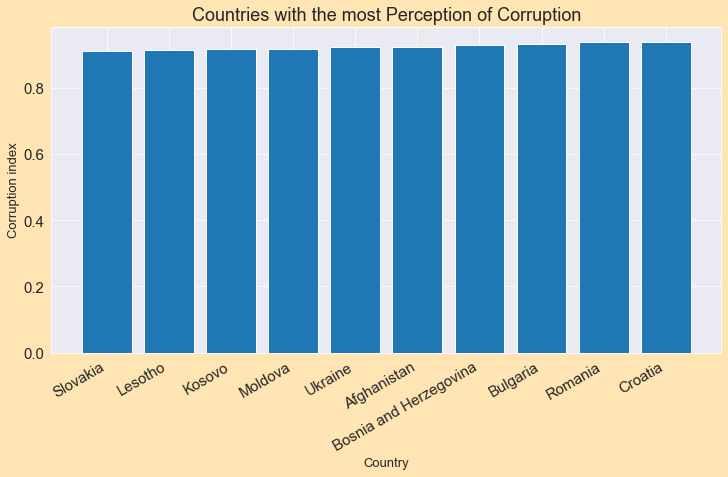

In [66]:
# Country with most corruption perceptions

country = df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with the most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name, country.perceptions_of_corruption)

### e. Is there a relationship between happiness and corruption?

Text(0, 0.5, 'Perception of Corruption')

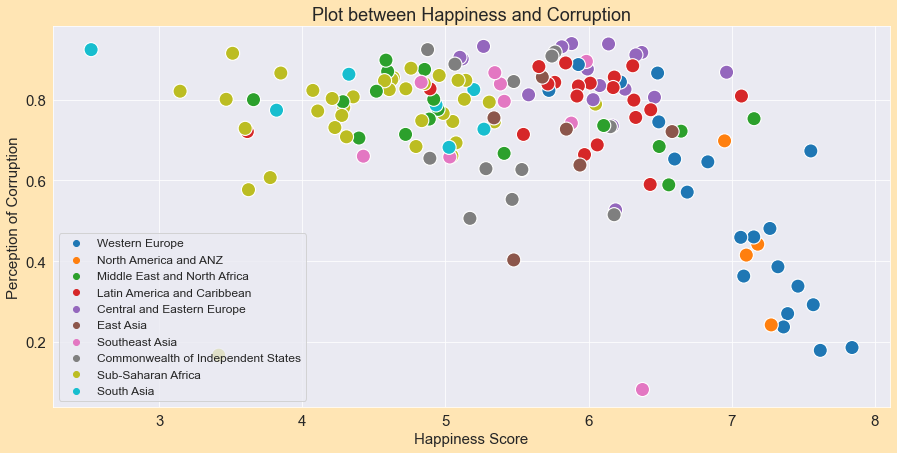

In [69]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot between Happiness and Corruption')
sns.scatterplot(x = df.happiness_score, y = df.perceptions_of_corruption, hue = df.regional_indicator, s = 200);

plt.legend(loc = 'lower left', fontsize = '12')
plt.xlabel('Happiness Score')
plt.ylabel('Perception of Corruption')

#### SUMMARY AND CONCLUSION

From the above analyses, I picked some columns to analyse and found relationships. These are what I deduced;
1. Regions with top happiness score are regions with lower perceptions of corruption. This goes to show that when
people are happy they will not involve in ways to shortchange the system thus creating chaos.
2. I find it astonishing that Sub-Saharan Africa recorded the region with the highest GDP of 290.707 yet very low on
happiness score. My findings and researches helped me discover Sub-Saharan Africa has 36 making it the
region with the highest number of countries in the world thus contributing to its high GDP.
3. From 2, low social support in the Sub-Saharan Africa region is the major contributor to the low happiness
score recorded with a strong correlation of 0.6. 
4. The heatmap shows clearly the correlation between the columns for example; countries with high happiness scores also 
align with an increase on GDP per capita, social support, healthy life expectancy and freedom to make life choice.

I conclude that the dataset analysed above is expository and a call for countries with low happiness score to commit to 
improve on social support, fredom to make life choices, healthy life expectancy. These inturn would reflect on a growth 
on happiness level.
